In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv('dataset.csv')
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
data.shape

(8950, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Preprocessing
## Handling Missing Values

In [10]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
data['CREDIT_LIMIT'].fillna(data['CREDIT_LIMIT'].mean(), inplace=True)

C:\Users\Mahek Fatema\AppData\Local\Temp\ipykernel_21840\3680916858.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].median(), inplace=True)
C:\Users\Mahek Fatema\AppData\Local\Temp\ipykernel_21840\3680916858.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##  Feature scaling and any necessary feature engineering

In [17]:
scaler = StandardScaler()
data['BALANCE_scaled'] = scaler.fit_transform(data[['BALANCE']])
data['BALANCE_FREQUENCY_scaled'] = scaler.fit_transform(data[['BALANCE_FREQUENCY']])
data['BALANCE_FREQUENCY_scaled'] = scaler.fit_transform(data[['BALANCE_FREQUENCY']])
data['PURCHASES_scaled'] = scaler.fit_transform(data[['PURCHASES']])
data['ONEOFF_PURCHASES_scaled'] = scaler.fit_transform(data[['ONEOFF_PURCHASES']])
data['INSTALLMENTS_PURCHASES_scaled'] = scaler.fit_transform(data[['INSTALLMENTS_PURCHASES']])
data['CASH_ADVANCE_scaled'] = scaler.fit_transform(data[['CASH_ADVANCE']])
data['PURCHASES_FREQUENCY_scaled'] = scaler.fit_transform(data[['PURCHASES_FREQUENCY']])
data['ONEOFF_PURCHASES_FREQUENCY_scaled'] = scaler.fit_transform(data[['ONEOFF_PURCHASES_FREQUENCY']])
data['PURCHASES_INSTALLMENTS_FREQUENCY_scaled'] = scaler.fit_transform(data[['PURCHASES_INSTALLMENTS_FREQUENCY']])

data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,TENURE,BALANCE_scaled,BALANCE_FREQUENCY_scaled,PURCHASES_scaled,ONEOFF_PURCHASES_scaled,INSTALLMENTS_PURCHASES_scaled,CASH_ADVANCE_scaled,PURCHASES_FREQUENCY_scaled,ONEOFF_PURCHASES_FREQUENCY_scaled,PURCHASES_INSTALLMENTS_FREQUENCY_scaled
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,12,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,12,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,12,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,12,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,12,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995


In [18]:
## Engineering Feature
data['PURCHASE_PER_FREQUENCY'] = data['PURCHASES'] / data['PURCHASES_FREQUENCY']
data['PAYMENTS_CREDIT_LIMIT_RATIO'] = data['PAYMENTS'] / data['CREDIT_LIMIT']
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,BALANCE_FREQUENCY_scaled,PURCHASES_scaled,ONEOFF_PURCHASES_scaled,INSTALLMENTS_PURCHASES_scaled,CASH_ADVANCE_scaled,PURCHASES_FREQUENCY_scaled,ONEOFF_PURCHASES_FREQUENCY_scaled,PURCHASES_INSTALLMENTS_FREQUENCY_scaled,PURCHASE_PER_FREQUENCY,PAYMENTS_CREDIT_LIMIT_RATIO
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,572.398855,0.201802
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,NaN,0.586148
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,773.170000,0.082942
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,...,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,17988.071952,0.000000
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,192.000768,0.565279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,291.120000,0.325594
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,...,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,300.000000,0.275861
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,173.280069,0.081271
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,NaN,0.105100


# Exploratory Data Analysis (EDA):

## What is the distribution of balance across customers?

In [65]:
# Summary Statistics
balance_summary = data['BALANCE'].describe()
balance_summary

count     8950.000000
mean      1564.474828
std       2081.531879
min          0.000000
25%        128.281915
50%        873.385231
75%       2054.140036
max      19043.138560
Name: BALANCE, dtype: float64

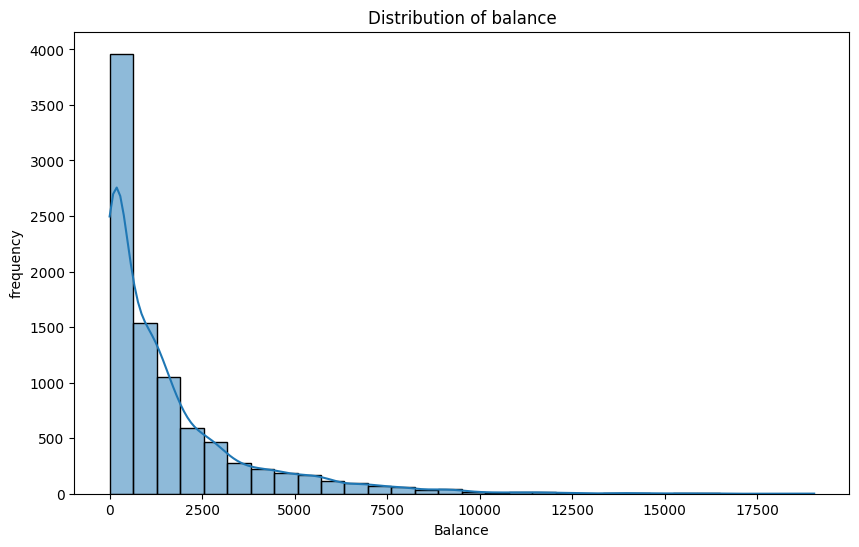

In [47]:
# Plotting Histogram

plt.figure(figsize = (10,6))
sns.histplot(data = data['BALANCE'],bins = 30, kde = True)
plt.xlabel("Balance")
plt.ylabel("frequency")
plt.title("Distribution of balance")
plt.show()

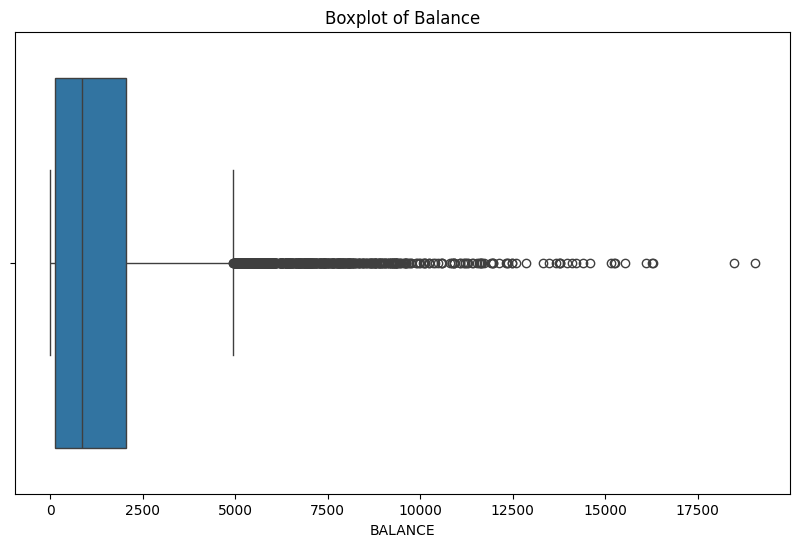

In [48]:
# Plotting Boxplot

plt.figure(figsize = (10,6))
sns.boxplot(x = data['BALANCE'])
plt.title("Boxplot of Balance")
plt.show()

In [51]:
# Skewness and Kurtosis

skewness = data['BALANCE'].skew()
Kurtosis = data['BALANCE'].kurt()
print(f"Skewness : {skewness}")
print(f"Kurtosis : {Kurtosis}")

Skewness : 2.393386042571806
Kurtosis : 7.6747512999062515


In [84]:
# Outliers

Q1 = data['BALANCE'].quantile(0.25)
Q3 = data['BALANCE'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

outliers = data[(data['BALANCE'] < lower) | (data['BALANCE'] > upper)]
print(f"Number of Outliers : {outliers.shape[0]}")

Number of Outliers : 695


## How are purchases (total, one-off, installment) distributed?

In [64]:
# Summary Statistics

purchase_summary = data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].describe()
purchase_summary

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
count,8950.000000,8950.000000,8950.000000
mean,1003.204834,592.437371,411.067645
std,2136.634782,1659.887917,904.338115
min,0.000000,0.000000,0.000000
25%,39.635000,0.000000,0.000000
50%,361.280000,38.000000,89.000000
75%,1110.130000,577.405000,468.637500
max,49039.570000,40761.250000,22500.000000


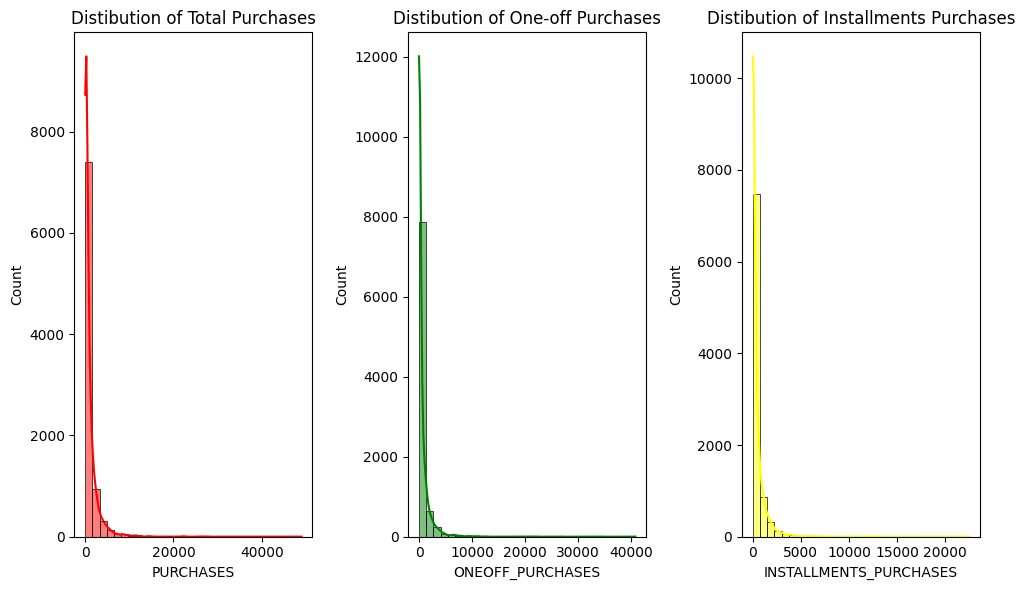

In [58]:
# Plotting Histogram

plt.figure(figsize = (10,6))

plt.subplot(1,3,1)
sns.histplot(data['PURCHASES'],bins = 30, kde = True, color = 'red')
plt.title('Distibution of Total Purchases')

plt.subplot(1,3,2)
sns.histplot(data['ONEOFF_PURCHASES'],bins = 30, kde = True, color = 'green')
plt.title('Distibution of One-off Purchases')

plt.subplot(1,3,3)
sns.histplot(data['INSTALLMENTS_PURCHASES'],bins = 30, kde = True, color = 'yellow')
plt.title('Distibution of Installments Purchases')

plt.tight_layout()
plt.show()

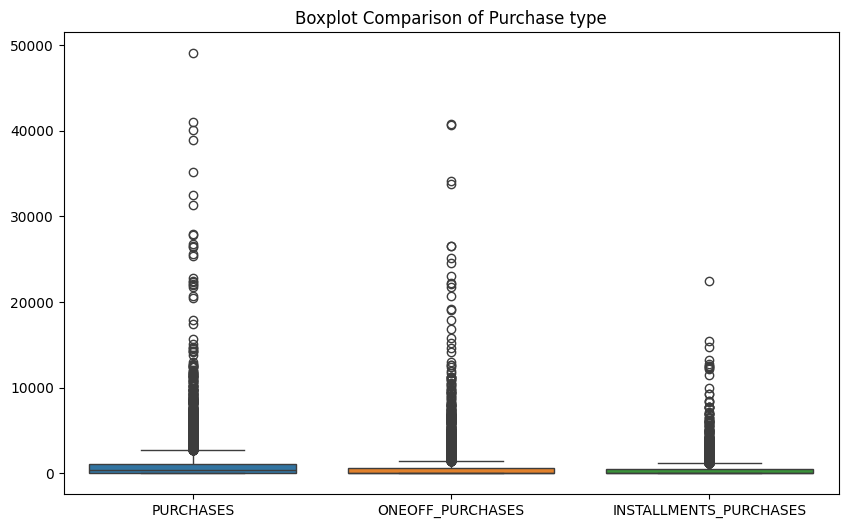

In [59]:
# Plotting Boxplot

plt.figure(figsize = (10,6))

sns.boxplot(data = data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']])

plt.title("Boxplot Comparison of Purchase type")
plt.show()

In [60]:
correlation_matrix = data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].corr()
correlation_matrix

,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
PURCHASES,1.000000,0.916845,0.679896
ONEOFF_PURCHASES,0.916845,1.000000,0.330622
INSTALLMENTS_PURCHASES,0.679896,0.330622,1.000000


In [61]:
# Skewness and Kurtosis

skewness = data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].skew()
Kurtosis = data[['PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].kurt()
print(f"Skewness : {skewness}")
print(f"Kurtosis : {Kurtosis}")

Skewness : PURCHASES                  8.144269
ONEOFF_PURCHASES          10.045083
INSTALLMENTS_PURCHASES     7.299120
dtype: float64
Kurtosis : PURCHASES                 111.388771
ONEOFF_PURCHASES          164.187572
INSTALLMENTS_PURCHASES     96.575178
dtype: float64


## Is there a correlation between credit limit and balance?

In [63]:
credit_balance_summary = data[['CREDIT_LIMIT','BALANCE']].describe()
credit_balance_summary

,CREDIT_LIMIT,BALANCE
count,8949.000000,8950.000000
mean,4494.449450,1564.474828
std,3638.815725,2081.531879
min,50.000000,0.000000
25%,1600.000000,128.281915
50%,3000.000000,873.385231
75%,6500.000000,2054.140036
max,30000.000000,19043.138560


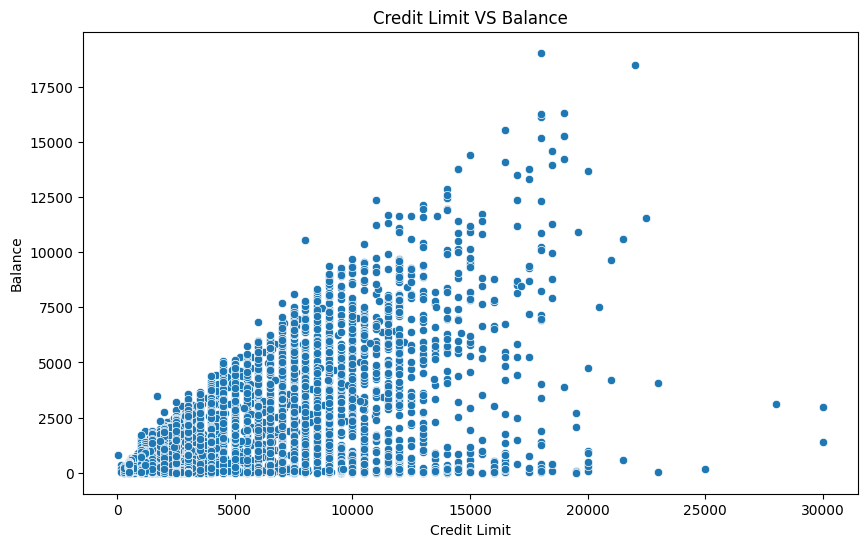

In [67]:
# Plotting Scatterplot

plt.figure(figsize = (10,6))
sns.scatterplot(x = data['CREDIT_LIMIT'], y = data['BALANCE'])
plt.title("Credit Limit VS Balance")
plt.xlabel("Credit Limit")
plt.ylabel("Balance")
plt.show()

In [72]:
Correlation = data[['CREDIT_LIMIT','BALANCE']].corr()
print("Correlation between Credit_Limit and Balance")
print(Correlation)

Correlation between Credit_Limit and Balance
              CREDIT_LIMIT   BALANCE
CREDIT_LIMIT      1.000000  0.531283
BALANCE           0.531283  1.000000


## What is the relationship between customer tenure and balance?

In [75]:
tenure_balance_summary = data[['TENURE','BALANCE']].describe()
tenure_balance_summary

,TENURE,BALANCE
count,8950.000000,8950.000000
mean,11.517318,1564.474828
std,1.338331,2081.531879
min,6.000000,0.000000
25%,12.000000,128.281915
50%,12.000000,873.385231
75%,12.000000,2054.140036
max,12.000000,19043.138560


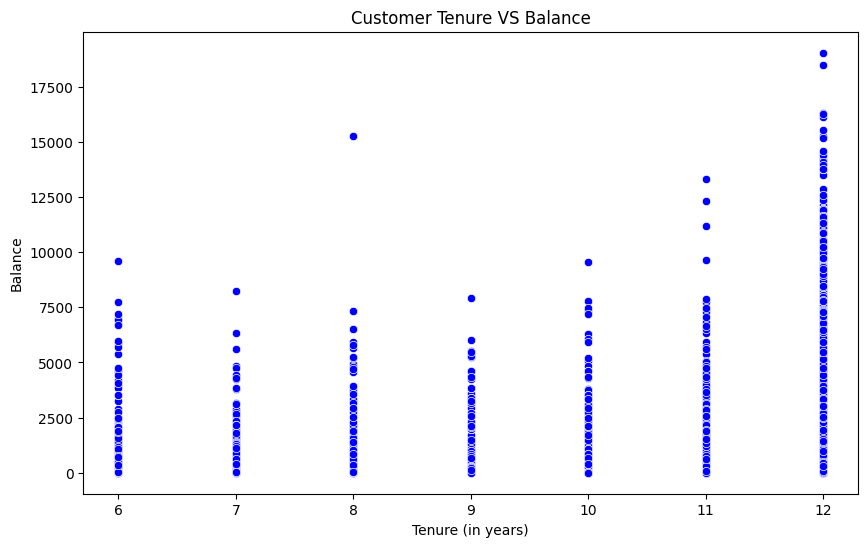

In [76]:
plt.figure(figsize = (10,6))

sns.scatterplot(x = data['TENURE'], y = data['BALANCE'], color = 'blue')
plt.title('Customer Tenure VS Balance')
plt.xlabel("Tenure (in years)")
plt.ylabel("Balance")
plt.show()

In [79]:
correlation = data[['TENURE','BALANCE']].corr()
correlation

,TENURE,BALANCE
TENURE,1.000000,0.072692
BALANCE,0.072692,1.000000


In [80]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,BALANCE_scaled
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,-0.731989
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.786961
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0.447135
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,0.049099
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,-0.358775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,-0.737950
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6,-0.742423
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,-0.740398
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,-0.745174


In [81]:
# Group by Tenure and calculate mean balance for each Tenure group
data.groupby('TENURE')['BALANCE'].mean()

TENURE
6     1095.890702
7     1003.800362
8     1127.963470
9     1098.752149
10    1251.955773
11    1641.770893
12    1619.158166
Name: BALANCE, dtype: float64

##  What is the trend of minimum payments in relation to total balance and purchases?

In [82]:
summary = data[['MINIMUM_PAYMENTS','BALANCE','PURCHASES']].describe()
summary

,MINIMUM_PAYMENTS,BALANCE,PURCHASES
count,8637.000000,8950.000000,8950.000000
mean,864.206542,1564.474828,1003.204834
std,2372.446607,2081.531879,2136.634782
min,0.019163,0.000000,0.000000
25%,169.123707,128.281915,39.635000
50%,312.343947,873.385231,361.280000
75%,825.485459,2054.140036,1110.130000
max,76406.207520,19043.138560,49039.570000


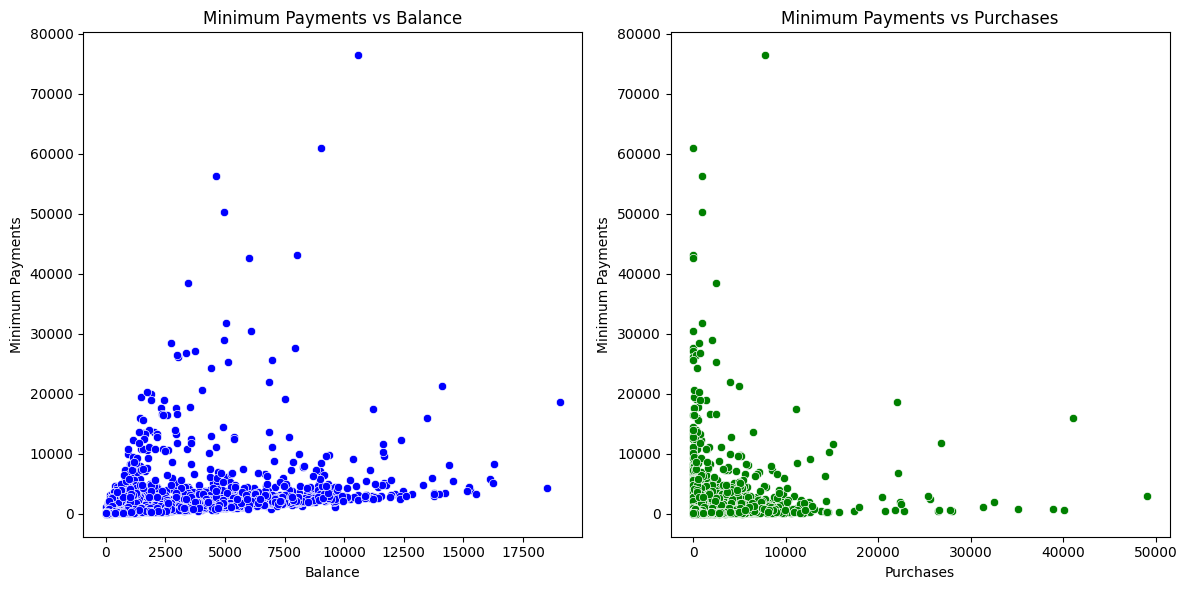

In [105]:
# scatter plot

# Minimum Payments VS Balance

plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.scatterplot(x = data['BALANCE'], y = data['MINIMUM_PAYMENTS'], color = 'blue')
plt.title('Minimum Payments vs Balance')
plt.xlabel('Balance')
plt.ylabel('Minimum Payments')


plt.subplot(1,2,2)
sns.scatterplot(x = data['PURCHASES'], y = data['MINIMUM_PAYMENTS'], color = 'green')
plt.title('Minimum Payments vs Purchases')
plt.xlabel('Purchases')
plt.ylabel('Minimum Payments')

plt.tight_layout()
plt.show()

In [88]:
correlation_matrix = data[['MINIMUM_PAYMENTS', 'BALANCE', 'PURCHASES']].corr()
correlation_matrix

,MINIMUM_PAYMENTS,BALANCE,PURCHASES
MINIMUM_PAYMENTS,1.000000,0.398684,0.093860
BALANCE,0.398684,1.000000,0.181261
PURCHASES,0.093860,0.181261,1.000000


## How frequently do customers make purchases vs. cash advances?

In [90]:
summary = data['PURCHASES_FREQUENCY'].describe()
summary

count    8950.000000
mean        0.490351
std         0.401371
min         0.000000
25%         0.083333
50%         0.500000
75%         0.916667
max         1.000000
Name: PURCHASES_FREQUENCY, dtype: float64

In [92]:
correlation = data[['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']].corr()
correlation

,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY
PURCHASES_FREQUENCY,1.000000,-0.308478
CASH_ADVANCE_FREQUENCY,-0.308478,1.000000


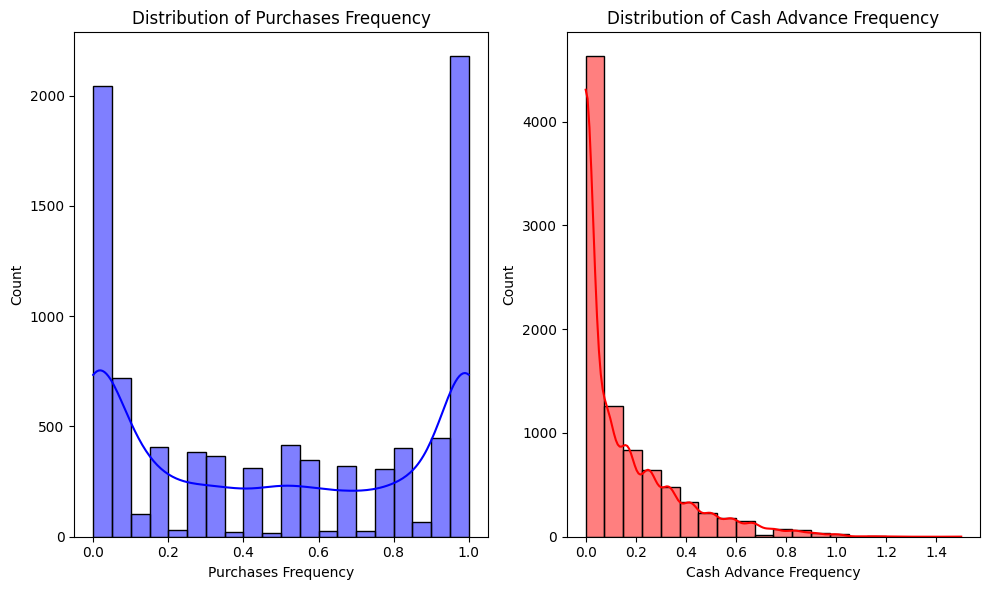

In [104]:
plt.figure(figsize=(10, 6))

# Histogram for Purchases Frequency
plt.subplot(1, 2, 1)
sns.histplot(data['PURCHASES_FREQUENCY'], bins = 20, kde = True, color = 'blue')
plt.title('Distribution of Purchases Frequency')
plt.xlabel('Purchases Frequency')

# Histogram for Cash Advance Frequency
plt.subplot(1, 2, 2)
sns.histplot(data['CASH_ADVANCE_FREQUENCY'], bins = 20, kde = True, color = 'red')
plt.title('Distribution of Cash Advance Frequency')
plt.xlabel('Cash Advance Frequency')

plt.tight_layout()
plt.show()

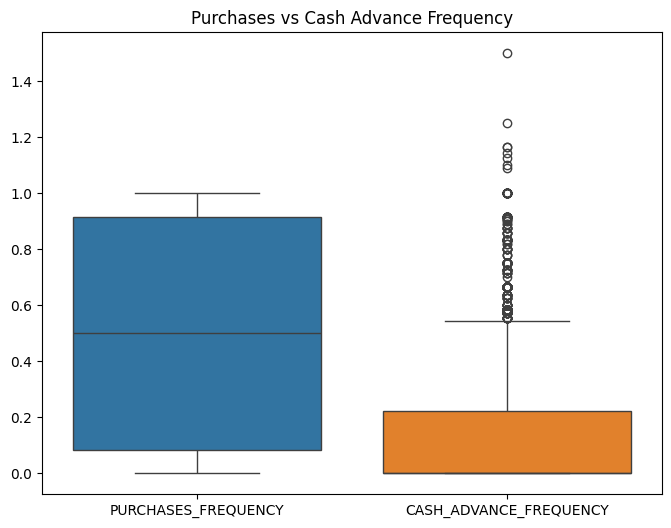

In [103]:
# Box plot to compare Purchases Frequency vs Cash Advance Frequency
plt.figure(figsize = (8, 6))
sns.boxplot(data = data[['PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']])
plt.title('Purchases vs Cash Advance Frequency')
plt.show()

## What is the percentage of customers who make full payments?

In [100]:
full_payers = data[data['PRC_FULL_PAYMENT'] >= 0.9]

percentage_full_payers = (len(full_payers) / len(data)) * 100

print(f"Percentage of customers who make full payments: {percentage_full_payers:.2f}%")


Percentage of customers who make full payments: 6.70%


## How do payments compare to total purchases?

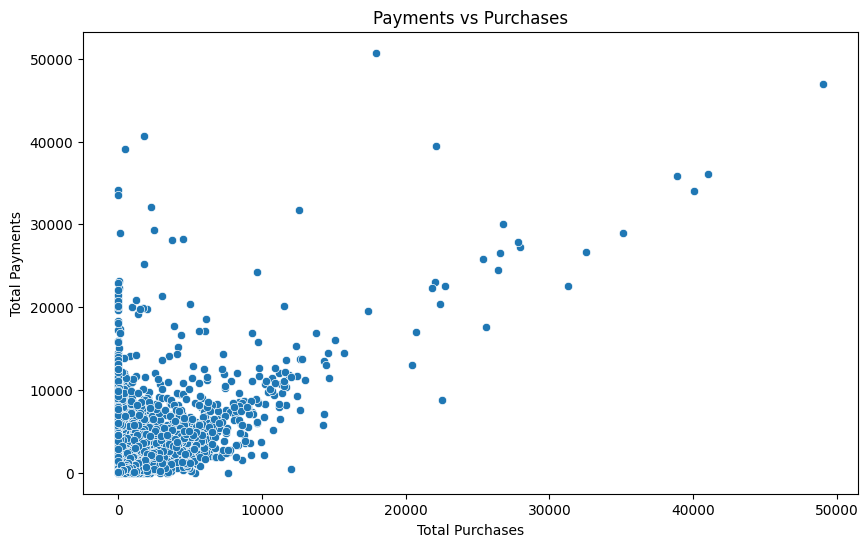

In [106]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = data['PURCHASES'], y = data['PAYMENTS'])
plt.title('Payments vs Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Total Payments')
plt.show()

In [108]:
data['PAYMENTS_TO_PURCHASES_RATIO'] = data['PAYMENTS'] / data['PURCHASES']

low_payment_customers = data[data['PAYMENTS_TO_PURCHASES_RATIO'] < 0.8]
high_payment_customers = data[data['PAYMENTS_TO_PURCHASES_RATIO'] > 1.2]
low_payment_customers[['CUST_ID', 'PURCHASES', 'PAYMENTS', 'PAYMENTS_TO_PURCHASES_RATIO']].head()

,CUST_ID,PURCHASES,PAYMENTS,PAYMENTS_TO_PURCHASES_RATIO
3,C10004,1499.00,0.000000,0.000000
8,C10009,861.49,688.278568,0.798940
11,C10012,1492.18,705.618627,0.472878
12,C10013,3217.99,608.263689,0.189020
13,C10014,2137.93,1655.891435,0.774530


In [109]:
high_payment_customers[['CUST_ID', 'PURCHASES', 'PAYMENTS', 'PAYMENTS_TO_PURCHASES_RATIO']].head()

,CUST_ID,PURCHASES,PAYMENTS,PAYMENTS_TO_PURCHASES_RATIO
0,C10001,95.4,201.802084,2.115326
1,C10002,0.0,4103.032597,inf
4,C10005,16.0,678.334763,42.395923
7,C10008,436.2,679.065082,1.556775
14,C10015,0.0,805.647974,inf


## Which customers are most likely to rely on cash advances?

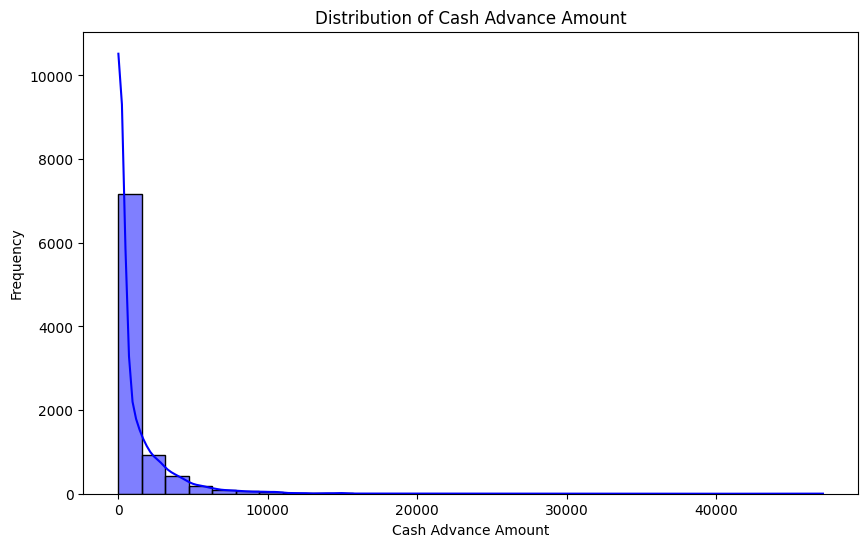

In [112]:
plt.figure(figsize = (10, 6))
sns.histplot(data['CASH_ADVANCE'], kde = True, bins = 30, color = 'blue')
plt.title('Distribution of Cash Advance Amount')
plt.xlabel('Cash Advance Amount')
plt.ylabel('Frequency')
plt.show()

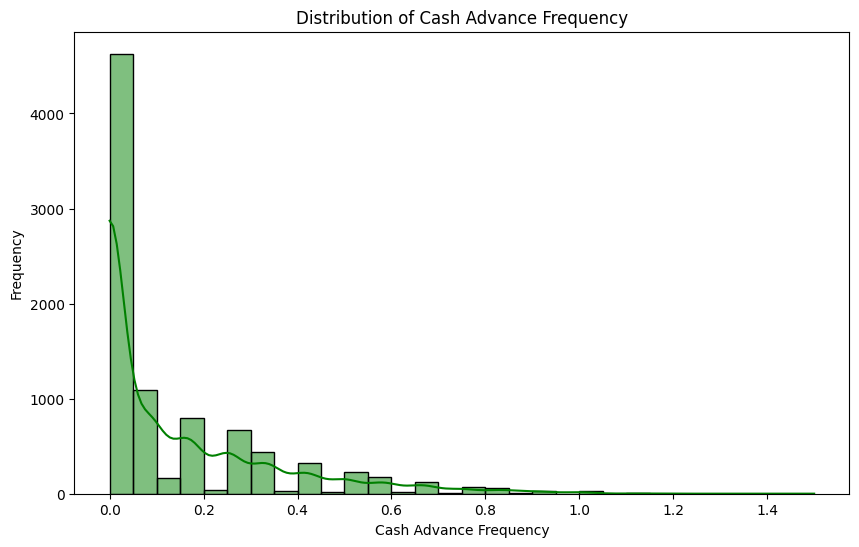

In [113]:
plt.figure(figsize = (10, 6))
sns.histplot(data['CASH_ADVANCE_FREQUENCY'], kde = True, bins = 30, color = 'green')
plt.title('Distribution of Cash Advance Frequency')
plt.xlabel('Cash Advance Frequency')
plt.ylabel('Frequency')
plt.show()

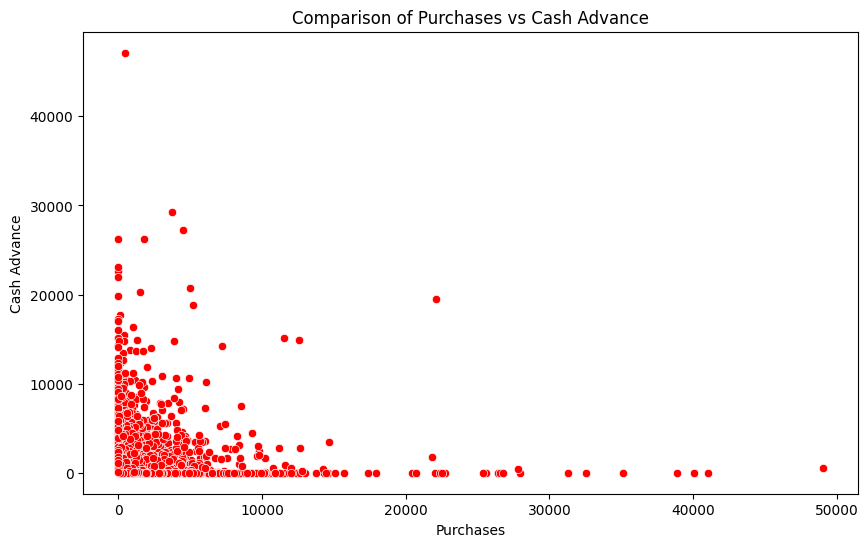

In [115]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = data['PURCHASES'], y = data['CASH_ADVANCE'], color = 'red')
plt.title('Comparison of Purchases vs Cash Advance')
plt.xlabel('Purchases')
plt.ylabel('Cash Advance')
plt.show()

In [116]:
high_cash_advancers = data[data['CASH_ADVANCE'] > data['CASH_ADVANCE'].quantile(0.75)]
high_cash_advancers[['CUST_ID', 'CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY', 'PURCHASES', 'CREDIT_LIMIT', 'BALANCE']].head()

,CUST_ID,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,PURCHASES,CREDIT_LIMIT,BALANCE
1,C10002,6442.945483,0.250000,0.00,7000.0,3202.467416
15,C10016,2301.491267,0.166667,1611.70,8000.0,6886.213231
16,C10017,2784.274703,0.250000,0.00,3000.0,2072.074354
23,C10024,7974.415626,0.333333,4248.35,9000.0,3800.151377
28,C10029,2236.145259,0.833333,387.05,10500.0,7152.864372


## Are there any significant outliers in the credit limit or balance columns?

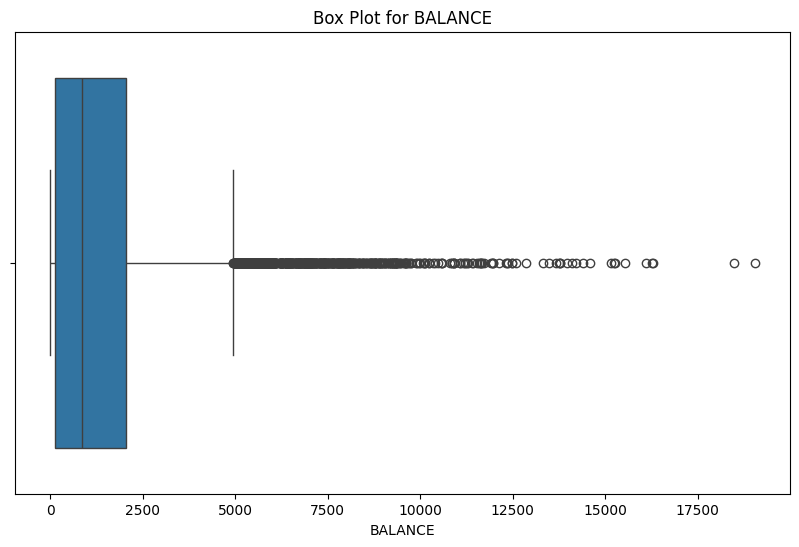

In [117]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = data['BALANCE'])
plt.title('Box Plot for BALANCE')
plt.show()

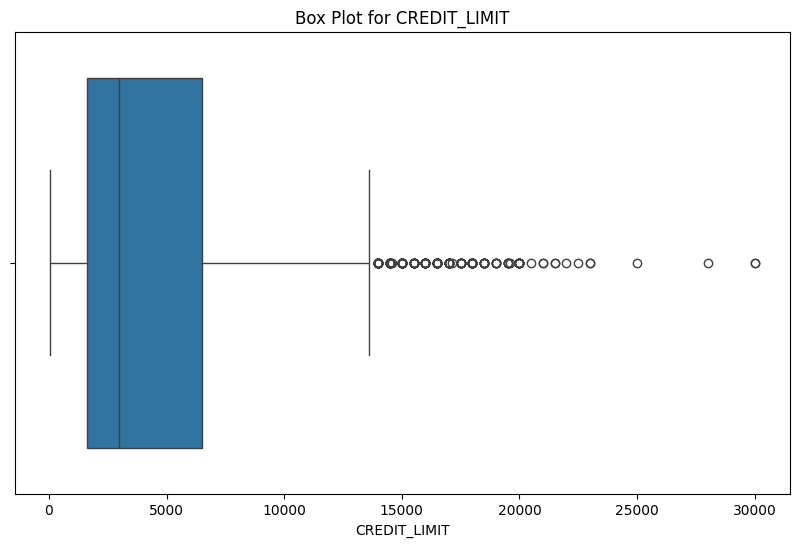

In [120]:
plt.figure(figsize = (10, 6))
sns.boxplot(x = data['CREDIT_LIMIT'])
plt.title('Box Plot for CREDIT_LIMIT')
plt.show()

In [123]:
Q1_bl = data['BALANCE'].quantile(0.25)
Q3_bl = data['BALANCE'].quantile(0.75)
IQR = Q3_bl - Q1_bl
balance_outliers = data[(data['BALANCE'] < (Q1_bl - 1.5 * IQR)) | (data['BALANCE'] > (Q3_bl + 1.5 * IQR))]



# Display the number of outliers
print(f"Number of outliers in BALANCE: {balance_outliers.shape[0]}")


Number of outliers in BALANCE: 695


In [125]:
Q1_cl = data['CREDIT_LIMIT'].quantile(0.25)
Q3_cl = data['CREDIT_LIMIT'].quantile(0.75)
IQR_cl = Q3_cl - Q1_cl
credit_limit_outliers = data[(data['CREDIT_LIMIT'] < (Q1_cl - 1.5 * IQR_cl)) | (data['CREDIT_LIMIT'] > (Q3_cl + 1.5 * IQR_cl))]
print(f"Number of outliers in CREDIT_LIMIT: {credit_limit_outliers.shape[0]}")

Number of outliers in CREDIT_LIMIT: 248


# Clustering analysis

## K-Means Cluster

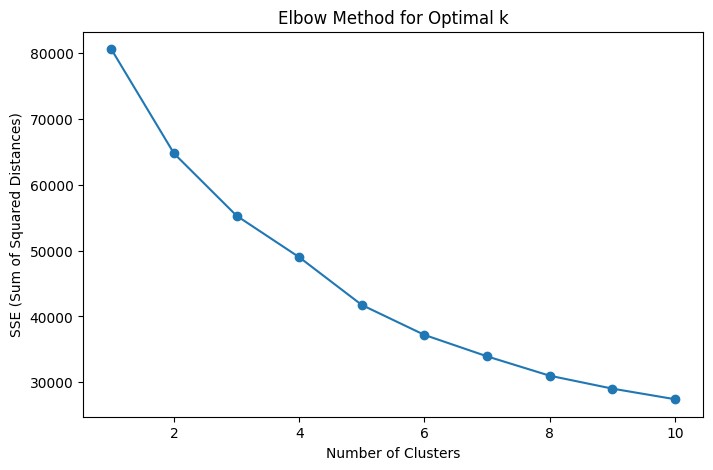

Cluster centers:
 [[ 1.57302282  0.16131937  0.15526235  0.0958967   1.23174521  1.26716692
   0.74963757  0.68232215  0.13405722]
 [-0.33524125 -0.13571739 -0.12175732 -0.09711168 -0.24462668 -0.28652492
  -0.21911766 -0.15081043 -0.03240734]
 [ 1.19594856  5.64064415  4.94617746  4.24796436 -0.03721671  1.86009119
   3.80195958  0.81250266  0.31086347]]

Cluster labels assigned:
 Cluster
1    7353
0    1462
2     135
Name: count, dtype: int64


In [164]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

columns_for_clustering = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 
                          'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'TENURE']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_for_clustering])

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

print("Cluster centers:\n", kmeans.cluster_centers_)
print("\nCluster labels assigned:\n", data['Cluster'].value_counts())


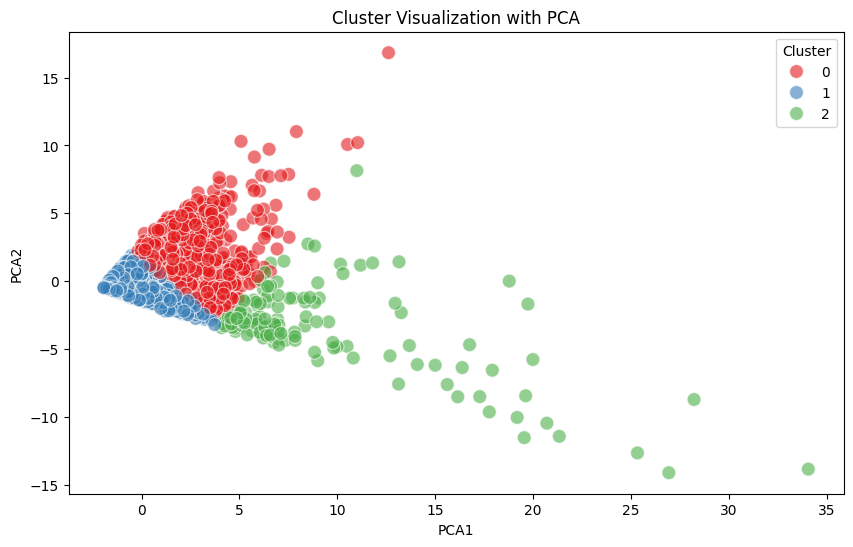

In [165]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

df_pca = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = data['Cluster']

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='Set1', s=100, alpha=0.6)
plt.title('Cluster Visualization with PCA')
plt.show()

## DBSCAN

cluster
 0    8858
-1      67
 2       9
 1       6
 3       5
 4       5
Name: count, dtype: int64


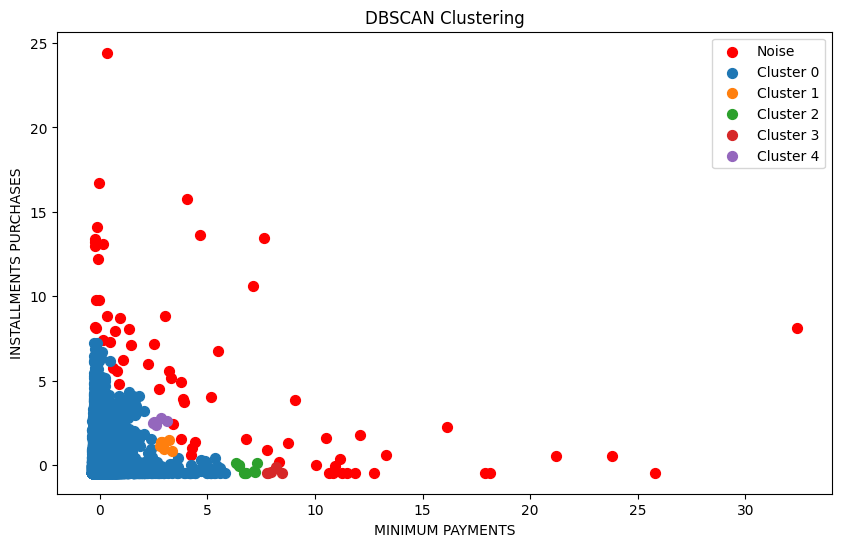

In [167]:
from sklearn.cluster import DBSCAN

features = ['MINIMUM_PAYMENTS', 'INSTALLMENTS_PURCHASES']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

dbscan = DBSCAN(eps=0.5, min_samples=5)
data['cluster'] = dbscan.fit_predict(scaled_data)

print(data['cluster'].value_counts())

plt.figure(figsize=(10, 6))


for cluster_label in np.unique(data['cluster']):
    cluster_data = data[data['cluster'] == cluster_label]
    if cluster_label == -1:
        plt.scatter(cluster_data['MINIMUM_PAYMENTS'], cluster_data['INSTALLMENTS_PURCHASES'], 
                    label='Noise', color='red', s=50)
    else:
        plt.scatter(cluster_data['MINIMUM_PAYMENTS'], cluster_data['INSTALLMENTS_PURCHASES'], 
                    label=f'Cluster {cluster_label}', s=50)

plt.title('DBSCAN Clustering')
plt.xlabel('MINIMUM PAYMENTS')
plt.ylabel('INSTALLMENTS PURCHASES')
plt.legend()
plt.show()

## Silhouette score

In [158]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(scaled_data, data['Cluster'])
print("Silhouette Score: ", silhouette_avg)

Silhouette Score:  0.44657378909073103


## Optimal number of clusters.

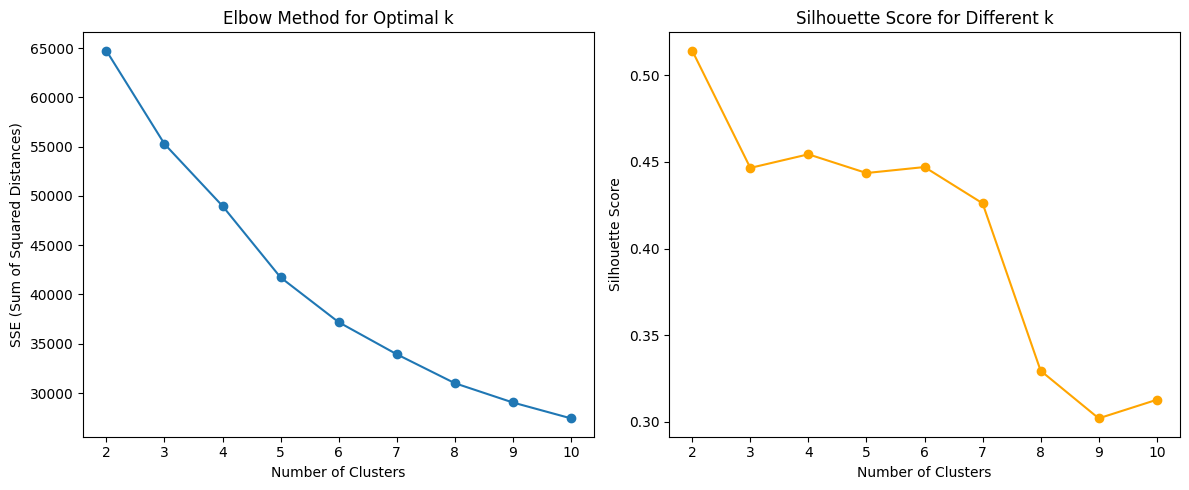

In [157]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


columns_for_clustering = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 
                          'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
                          'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 
                          'TENURE']


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[columns_for_clustering])


sse = []
silhouette_scores = []
cluster_range = range(2, 11)  
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    sse.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Plotting the Elbow Curve
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Distances)')
plt.title('Elbow Method for Optimal k')

# Plotting the Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k')

plt.tight_layout()
plt.show()

# Cluster profiling and marketing recommendations

## Detailed descriptions of each segment.

In [162]:
cluster_summary = data.groupby('Cluster').agg(
    BALANCE=('BALANCE', 'mean'),
    PURCHASES=('PURCHASES', 'mean'),
    ONEOFF_PURCHASES=('ONEOFF_PURCHASES', 'mean'),
    INSTALLMENTS_PURCHASES=('INSTALLMENTS_PURCHASES', 'mean'),
    CASH_ADVANCE=('CASH_ADVANCE', 'mean'),
    CREDIT_LIMIT=('CREDIT_LIMIT', 'mean'),
    PAYMENTS=('PAYMENTS', 'mean'),
    MINIMUM_PAYMENTS=('MINIMUM_PAYMENTS', 'mean'),
    TENURE=('TENURE', 'mean'),
    COUNT=('Cluster', 'size')
).reset_index()

cluster_summary


,Cluster,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE,COUNT
0,0,4843.070894,1344.700369,848.299193,0.094433,3566.770992,9105.064669,3901.684412,0.683445,11.696306,1462
1,1,866.887672,714.044613,390.836448,-0.096768,465.750818,3453.463625,1099.897985,-0.150807,11.474092,7353
2,2,4053.740804,13054.528000,8802.078889,4.247964,900.825929,11262.222222,12739.444295,0.812503,11.933333,135


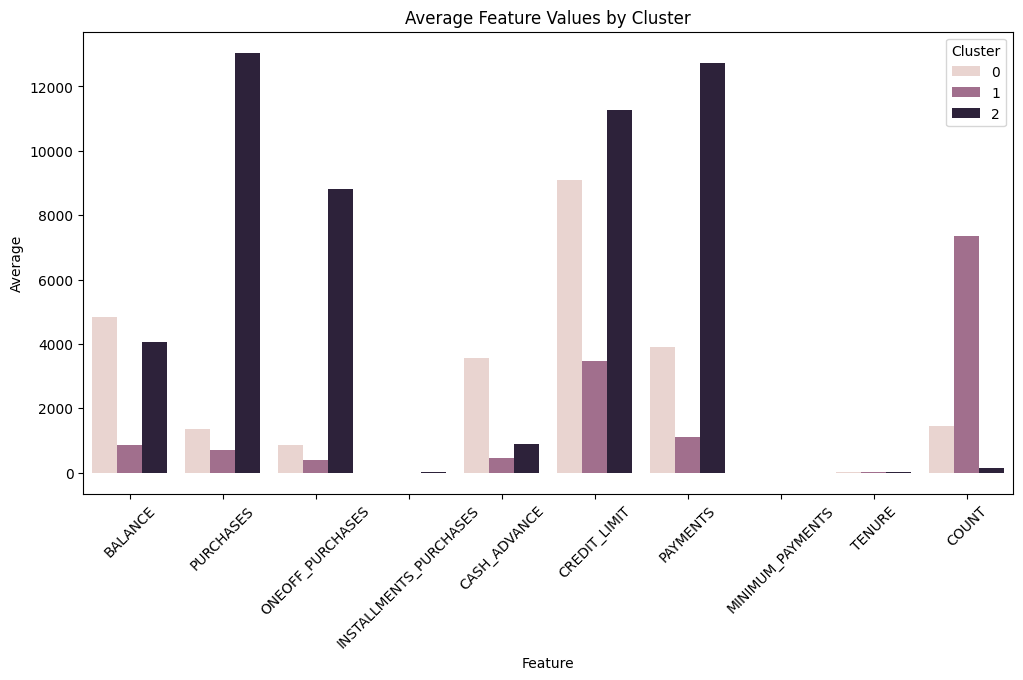

In [160]:
melted_summary = cluster_summary.melt(id_vars='Cluster', var_name='Feature', value_name='Average')

plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Average', hue='Cluster', data=melted_summary)
plt.xticks(rotation=45)
plt.title('Average Feature Values by Cluster')
plt.show()

### Cluster 0 has a high average BALANCE and PURCHASES, indicating these customers are high spenders.
### Cluster 1 has low average CASH_ADVANCE and moderate CREDIT_LIMIT, suggesting they are cautious users.

##  Marketing Strategies

### High Spenders (e.g., Cluster 0):

##### Description: Customers with high balances and frequent purchases.
##### Strategy: Offer loyalty programs, premium rewards, and personalized offers.


### Moderate Users (e.g., Cluster 1):

##### Description: Average balances and purchases; engaged but not high spenders.
##### Strategy: Encourage them to use products more frequently with targeted promotions and rewards.


### Budget-Conscious Customers (e.g., Cluster 2):

##### Description: Low balances and low purchases; likely to be sensitive to spending.
##### Strategy: Provide financial education, budgeting tools, and discounts on essential services.